# Exercise sheet 5 solution

## Introduction:
In this exercise, you get familiar with the basic concepts of probability and statistics. We recommend you to read this article to ensure you know the basic concepts well:
https://towardsdatascience.com/an-in-depth-crash-course-on-random-variables-a3905d03e322

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

# 1 (6 points)
## Binomial distribution:
The binomial distribution with parameters n and p is a class of the discrete probability distributions of <b> the number of successes in a sequence of $n$ independent experiments, </b> each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability $p$) or failure (with probability $1 − p$). The probability of happening $x$ times success in $n$ trials is:
$$
    p(x) = \binom{n}{x}p^x (1-p)^{n-x} 
$$

In [3]:
n = 20 # The total number of trials
p = 0.5 # The probability of success in each trial
X = stats.binom(n, p)
# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.binom.html#scipy.stats.binom

### 1a (2 points)
Generate 10000 random samples from the given binomial distribution and plot the histogram.

Hint: Use X.rvs()

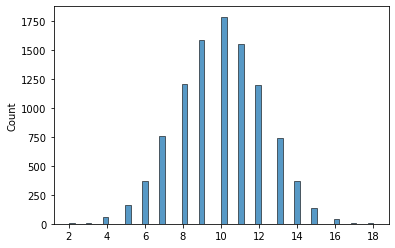

In [6]:
n_samples=10000
np.random.seed(0)
x = X.rvs(n_samples)
sns.histplot(x)


In [7]:
print(x.mean())
print(x.std())
assert_equal(len(x), n_samples)
assert_almost_equal(x.mean(), 9.968 , places=2)
assert_almost_equal(x.std() , 2.249 , places=2)

9.9682
2.249486332476817


### 1b (2 points)
What are $\text{P}(X = 8)$, $\text{P}(X = 10)$ and $\text{P}(X = 12)$?

Hint: Use X.pmf()

In [8]:
p8 = X.pmf(8)
p10 = X.pmf(10)
p12 = X.pmf(12)
print('P(X=8)={:.4f}|P(X=10)={:.4f}|P(X=12)={:.4f}'.format(p8, p10, p12))


P(X=8)=0.1201|P(X=10)=0.1762|P(X=12)=0.1201


In [9]:
print((p8 - p12)/p10)
print((p10*p12)+p8)

assert_almost_equal((p8 - p12)/p10, 0)
assert_almost_equal((p10*p12)+p8, 0.141 , places=2)

0.0
0.1413016725928173


Which point has the highest probability? Why?

We expect  $x=10$  has the highest probability since we have  $n=20$  trials with a probability of success  $p=0.5$, which means  $x=n \times p=10$  number of success should have the highest probability.

### 1c (1 points bonus)
What are $\text{P}(X \leq 8)$, $\text{P}(X \leq 10)$, $\text{P}(X \leq 12)$ and $\text{P}(X \leq 20)$?

Hint: Use X.cdf()

In [10]:
p_le8 = X.cdf(8)
p_le10 = X.cdf(10)
p_le12 = X.cdf(12)
p_le20 = X.cdf(20)

print('P(X<=8)={:.4f}\nP(X<=10)={:.4f}\nP(X<=12)={:.4f}\nP(X<=20)={:.4f}'.format(p_le8, p_le10, p_le12,p_le20))


P(X<=8)=0.2517
P(X<=10)=0.5881
P(X<=12)=0.8684
P(X<=20)=1.0000


In [11]:
print(p_le10 - p_le8)
print((p_le12 - p_le20)/p_le8)

assert_almost_equal(p_le10 - p_le8, 0.336 , places=2)
assert_almost_equal((p_le12 - p_le20)/p_le8 , -0.522 , places=2)

0.33637619018554704
-0.5227505209319946


Do you see an increasing trend? Is $\text{P}(X \leq 20)$ the highest value and equals 1? Why? 

The cumulative distribution function (CDF) of a random variable evaluated at $x$ is the probability that the random variable takes a value less than or equal to $x$. So we expect it to be an increasing function of $x$. The given random variable in this problem has values in a finite interval $[0,20]$; therefore, $\text{CDF}(x=20)$ should be equal to 1 and has the highest value.

### 1d (2 points)
What are the mean, standard deviation and median of the generated samples?

Hint: You can use numpy!

In [12]:
mean = np.mean(x)
std = np.std(x)
median = np.median(x)

print('Mean={:.4f}|Std={:.4f}|Median={:.4f}'.format(mean, std, median))


print((mean - std)/median)
print((mean ** std)+ median)

Mean=9.9682|Std=2.2495|Median=10.0000
0.7718713667523183
186.34969576346643


In [13]:
assert_almost_equal((mean - std)/median, 0.771 , places=2)
assert_almost_equal((mean ** std)+ median, 186.349 , places=2)

Is the mean close to $n \times p$? Why should we expect this?

The mean of The binomial distribution with parameters n and p has an analetical solution:
$\mathbb{E}[X] = np$

# 2 (6 points)
## Multimodal distributions:
Now we consider samples from two binomial distributions with different p values.

In [14]:
n = 20
p1 = 0.2
p2 = 0.8
X1 = stats.binom(n, p1)
X2 = stats.binom(n, p2)

### 2a (2 points)

Generate 5000 random samples from each of these two binomial distributions and concatenate the samples to make a unified vector. Plot the histogram of the concatenated samples.

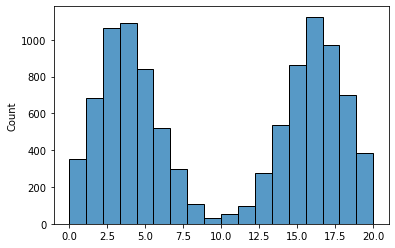

In [16]:
n_samples=5000
np.random.seed(0)

x1 = X1.rvs(n_samples)
x2 = X2.rvs(n_samples)
x = np.concatenate([x1,x2])
sns.histplot(x)

In [17]:
print((x1.mean() + x2.mean())/x.mean())
print((x1.mean() - x2.mean())*x.mean())

assert_almost_equal((x1.mean() + x2.mean())/x.mean(), 2.000 , places=2)
assert_almost_equal((x1.mean() - x2.mean())*x.mean(), -120.670 , places=2)

2.0000000000000004
-120.67095896


### 2b (4 points)

Calculate the mean, median and the first two modes of the concatenated samples.

Hint: You can use np.unique and np.argsort to find the first and the second modes

In [19]:
mean = np.mean(x)
median = np.median(x)
vals, counts = np.unique(x, return_counts=True)
counts = np.argsort(counts)[::-1]
mode1 = counts[0]
mode2 = counts[1]


print('Mean: {:.2f} \nMedian: {:.2f} \nFirst mode: {:.2f}\nSecond mode: {:.2f}'.format(mean, median, mode1, mode2))

Mean: 10.01 
Median: 10.00 
First mode: 16.00
Second mode: 4.00


In [17]:
print((mean - median)/mode1)
print((mode1 - mode2)/ mean)

assert_almost_equal((mean - median)/mode1, 0.000 , places=2)
assert_almost_equal((mode1 - mode2)/ mean, 1.198 , places=2)

0.0006374999999999575
1.1987772472078482


Which of these is a better represetation of this type of data? Why?

All these estimators have crucial information about the distribution. Nevertheless, modes refer to the values with the highest probabilities, which might be of paramount importance in scientific applications.

# 3 (3 points)

## Normal distribution:
Normal (Gaussian) distribution is a class of continuous probability distributions with mean $\mu$ and standard deviation $\sigma$:
$$
    p(x) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

In [20]:
mu = 3.0
sigma = 2.0
X = stats.norm(loc = mu , scale = sigma)

# Please check this page for more information: 
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

### 3a (1 points)

Generate 10000 random samples from the the given normal distribution and plot the histogram.

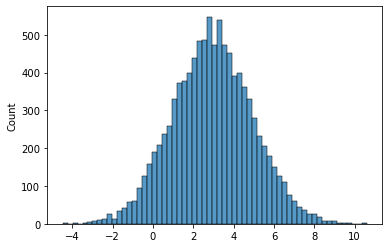

In [21]:
n_samples=10000
np.random.seed(0)

x = X.rvs(n_samples)
sns.histplot(x)

In [22]:
print(x.mean())
print(x.std())

assert_equal(len(x), n_samples)
assert_almost_equal(x.mean(), 2.963 , places=2)
assert_almost_equal(x.std() , 1.975 , places=2)

2.963132559683469
1.9751131363522416


### 3b (1 points)

What are $\text{P}(X = 2)$, $\text{P}(X = 3)$ and $\text{P}(X = 4)$?

In [23]:
# As explained in the introduction link, the probability of a single point in 
# continuous distributions is zero, since we have infinitely many points in an interval.
p2 = 0.0 
p3 = 0.0
p4 = 0.0

print('P(X=2)={:.4f}|P(X=3)={:.4f}|P(X=4)={:.4f}'.format(p2, p3, p4))

P(X=2)=0.0000|P(X=3)=0.0000|P(X=4)=0.0000


In [24]:
assert_equal((p2 - p3), 0)
assert_equal((p2*p3)+p4, 0)

### 3c (1 points bonus)

What are $\text{P}(X \leq 2)$, $\text{P}(2 < X \leq 3)$ and $\text{P}(X \geq 4)$?

In [25]:
p_le2 = X.cdf(2)
p_g2_le3 = X.cdf(3) - X.cdf(2)
p_ge4 = 1 - X.cdf(4)

print('P(X<=2)={:.4f}\nP(2<X<=3)={:.4f}\nP(X>=4)={:.4f}'.format(p_le2, p_g2_le3, p_ge4))

P(X<=2)=0.3085
P(2<X<=3)=0.1915
P(X>=4)=0.3085


In [26]:
print(p_le2 - p_ge4)
print((p_g2_le3 - p_le2)/p_ge4)

assert_equal(p_le2 - p_ge4, 0)
assert_almost_equal((p_g2_le3 - p_le2)/p_ge4 , -0.379 , places=2)

0.0
-0.37945164771651496


Are $\text{P}(X \leq 2)$ and $\text{P}(X \geq 4)$ equal? Why?

The normal distribution is symmetric around the mean. In this case, intervals $X \leq 2$ and $X \geq 4$ are symmetric intervals with respect to $\mu = 3$, therefore they should have equal probabilities.

### 3d (1 points)

What are the mean, standard deviation, and median of the generated samples?

In [28]:
mean = np.mean(x)
std = np.std(x)
median = np.median(x)

print('Mean={:.4f}|Std={:.4f}|Median={:.4f}'.format(mean, std, median))

Mean=2.9631|Std=1.9751|Median=2.9459


In [29]:
print((mean - std)/median)
print((mean ** std)+ median)

assert_almost_equal((mean - std)/median, 0.335 , places=2)
assert_almost_equal((mean ** std)+ median, 11.491 , places=2)

0.3353931166664757
11.491832527031372


Are the mean and std close to the $\mu$ and $\sigma$? How about the median? Why?

Yes, they can be even more accurate estimates of mean and std if we have more samples. Moreover, the median, mean, and mode are equal in a normal distribution.